In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_excel('heart_disease.xlsx' , sheet_name= 'Heart_disease')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       908 non-null    int64  
 1   sex       908 non-null    object 
 2   cp        908 non-null    object 
 3   trestbps  908 non-null    int64  
 4   chol      908 non-null    int64  
 5   fbs       908 non-null    bool   
 6   restecg   908 non-null    object 
 7   thalch    908 non-null    int64  
 8   exang     908 non-null    object 
 9   oldpeak   846 non-null    float64
 10  slope     908 non-null    object 
 11  thal      908 non-null    object 
 12  num       908 non-null    int64  
dtypes: bool(1), float64(1), int64(5), object(6)
memory usage: 86.1+ KB


In [6]:
df.isna().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalch       0
exang        0
oldpeak     62
slope        0
thal         0
num          0
dtype: int64

In [7]:
# converting the exang column to boolean datatype.
df['exang'] = df['exang'].astype('bool')

<Axes: >

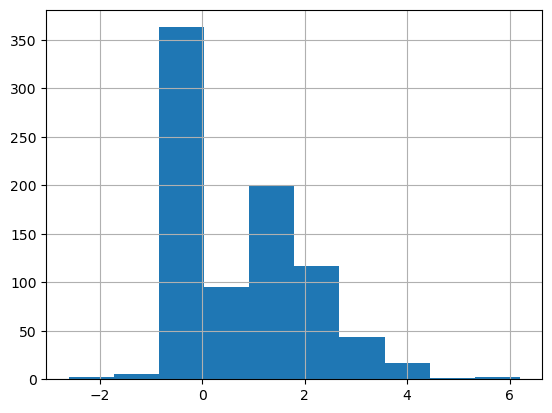

In [8]:
df['oldpeak'].hist()

In [9]:
df['oldpeak'].fillna( df['oldpeak'].median() , inplace = True)

C:\Users\ASHISH\AppData\Local\Temp\ipykernel_18656\3199033638.py:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['oldpeak'].fillna( df['oldpeak'].median() , inplace = True)


<Figure size 2000x800 with 0 Axes>

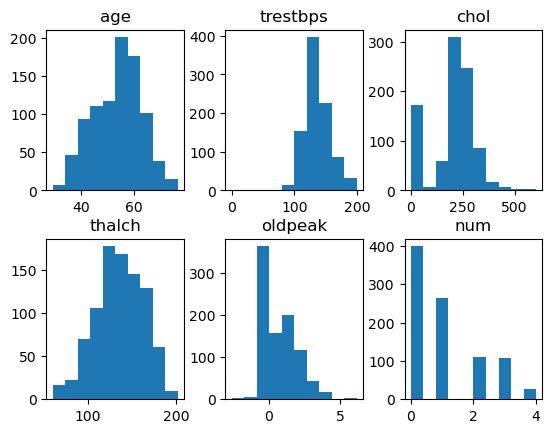

In [10]:
plt.figure( figsize = (20, 8))
axes = df.hist(layout= (2,3))

for ax in axes.flatten():
    ax.grid(False)

plt.show()

In [11]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,Male,typical angina,145,233,True,lv hypertrophy,150,False,2.3,downsloping,fixed defect,0
1,41,Male,atypical angina,135,203,False,normal,132,False,0.0,flat,fixed defect,0
2,57,Male,asymptomatic,140,192,False,normal,148,False,0.4,flat,fixed defect,0
3,52,Male,typical angina,118,186,False,lv hypertrophy,190,False,0.0,flat,fixed defect,0
4,57,Male,asymptomatic,110,201,False,normal,126,True,1.5,flat,fixed defect,0


In [12]:
df['sex'].value_counts()

sex
Male      718
Female    190
Name: count, dtype: int64

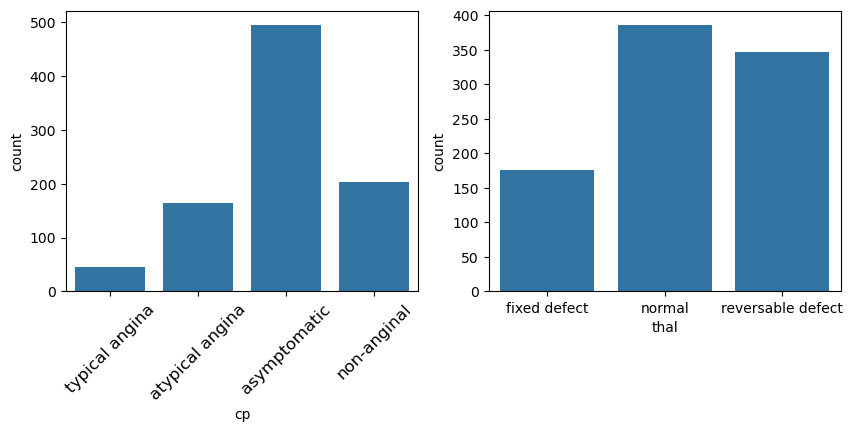

In [13]:
plt.figure(figsize=(10, 8))

plt.subplot(2,2,1)
sns.countplot(df, x = 'cp' )
plt.xticks(rotation = 45  , fontsize = 12)


plt.subplot(2,2,2)
sns.countplot( df , x = 'thal' )

plt.show()

In [14]:
df.corr(numeric_only =True)

,age,trestbps,chol,fbs,thalch,exang,oldpeak,num
age,1.000000,0.253999,-0.099967,0.176702,-0.328088,0.215375,0.217942,0.326493
trestbps,0.253999,1.000000,0.117488,0.111614,-0.133360,0.189106,0.134945,0.137251
chol,-0.099967,0.117488,1.000000,-0.113721,0.197907,-0.037429,0.032205,-0.238813
fbs,0.176702,0.111614,-0.113721,1.000000,-0.065428,0.039372,0.008154,0.156268
thalch,-0.328088,-0.133360,0.197907,-0.065428,1.000000,-0.358473,-0.112624,-0.323058
exang,0.215375,0.189106,-0.037429,0.039372,-0.358473,1.000000,0.342173,0.372352
oldpeak,0.217942,0.134945,0.032205,0.008154,-0.112624,0.342173,1.000000,0.406078
num,0.326493,0.137251,-0.238813,0.156268,-0.323058,0.372352,0.406078,1.000000


In [15]:
#encoding the categorical varibles.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()


In [16]:
df.select_dtypes(include = ['object' , 'boolean']).columns

Index(['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal'], dtype='object')

In [17]:
cols_to_encode = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'thal']
df[cols_to_encode] = le.fit_transform(cols_to_encode)

In [18]:
df


,age,sex,cp,trestbps,chol,fbs,restecg,thalch,exang,oldpeak,slope,thal,num
0,63,4,0,145,233,2,3,150,1,2.3,5,6,0
1,41,4,0,135,203,2,3,132,1,0.0,5,6,0
2,57,4,0,140,192,2,3,148,1,0.4,5,6,0
3,52,4,0,118,186,2,3,190,1,0.0,5,6,0
4,57,4,0,110,201,2,3,126,1,1.5,5,6,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
903,53,4,0,125,0,2,3,120,1,1.5,5,6,4
904,62,4,0,166,170,2,3,120,1,3.0,5,6,4
905,56,4,0,170,0,2,3,123,1,2.5,5,6,4
906,56,4,0,144,208,2,3,105,1,0.5,5,6,4


In [19]:
x = df.iloc[:, :-1]
y= df. iloc[:, -1]

In [20]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split( x, y , train_size= 0.8 , random_state= 3)

In [21]:
from sklearn import tree

In [22]:
model = tree.DecisionTreeClassifier( criterion= 'gini' , max_depth = 7 )

In [23]:
model.fit(xtrain , ytrain)

DecisionTreeClassifier(max_depth=7)

In [24]:
ypred = model.predict(xtest)

In [25]:
model.score( xtest , ytest)

0.5274725274725275

In [26]:
from sklearn.metrics import classification_report
from sklearn.model_selection import GridSearchCV

In [27]:
print(classification_report( ytest , ypred))

              precision    recall  f1-score   support

           0       0.70      0.76      0.73        87
           1       0.36      0.40      0.38        52
           2       0.33      0.28      0.30        25
           3       0.14      0.07      0.09        15
           4       1.00      0.33      0.50         3

    accuracy                           0.53       182
   macro avg       0.51      0.37      0.40       182
weighted avg       0.51      0.53      0.51       182



In [28]:
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [5, 6, 7, 8, 9, 10, 15 , 20 , 25 ,30],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 5, 10]
}

In [29]:
grid_search =GridSearchCV( estimator= model , param_grid = param_grid , cv=5, scoring='accuracy')

In [30]:
grid_search.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(max_depth=7),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 6, 7, 8, 9, 10, 15, 20, 25, 30],
                         'min_samples_leaf': [1, 2, 5, 10],
                         'min_samples_split': [2, 5, 10, 20]},
             scoring='accuracy')

In [31]:
grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 5}

In [32]:
model1 = tree.DecisionTreeClassifier( criterion ='entropy', max_depth = 5, min_samples_leaf =  1, min_samples_split = 5)

In [33]:
model1.fit(xtrain ,ytrain)
ypred = model1.predict(xtest)

In [34]:
print(classification_report(ytest ,ypred))

              precision    recall  f1-score   support

           0       0.69      0.75      0.72        87
           1       0.33      0.37      0.35        52
           2       0.27      0.12      0.17        25
           3       0.32      0.40      0.35        15
           4       0.00      0.00      0.00         3

    accuracy                           0.51       182
   macro avg       0.32      0.33      0.32       182
weighted avg       0.49      0.51      0.49       182



C:\Users\ASHISH\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ASHISH\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\ASHISH\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Interview Questions:

### 1. **Common Hyperparameters of Decision Tree Models**:
- **max_depth**: Limits tree depth. A deeper tree captures complex patterns but may overfit; a shallower tree may underfit.
- **min_samples_split**: Minimum samples required to split a node. Higher values prevent complex branches and reduce overfitting.
- **min_samples_leaf**: Minimum samples at a leaf node. Higher values smooth the model and reduce noise.
- **max_features**: Number of features to consider for splits. Limiting this helps improve generalization.

These hyperparameters control model complexity, balancing bias and variance.

---

### 2. **Difference Between Label Encoding and One-Hot Encoding**:
- **Label Encoding**: Converts categories into integers (e.g., "Red" → 0, "Green" → 1). It preserves ordinal relationships but may imply unintended order.
- **One-Hot Encoding**: Converts categories into binary vectors, creating separate columns for each category (e.g., "Red" → [1, 0, 0]).

**Key Difference**: Label encoding uses integers, while one-hot encoding uses binary representation, avoiding ordinal assumptions.